<a href="https://colab.research.google.com/github/riz-coder/DL/blob/main/cats_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip", 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
#Generators, divide data into batches, load accordingly

train_ds = keras.utils.image_dataset_from_directory(
    directory = ('/content/train'),
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = ('/content/test'),
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


- Store in Numpy arrays
- Value ranges from 0 - 255 in nump arrays
- We want 0 - 1 so just normalize it

In [ ]:
# Normalize, Value between 0 to 1

def process(image, label):
    image = tf.cast(image/255., tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# Create CNN Model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

In [ ]:
# Plot the accuracy

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red', label='Train')
plt.plot(history.history['val_accuracy'],color='blue', label='Validation')
plt.legend()
plt.show()

NameError: name 'history' is not defined

- Seems to be Overfitting
- We reduce it by following methods

1- Add more data

2- Data Augmentation

3- L1/L2 Regularization

4- Dropout

5- Batch Norm

6- Reduce Complexity



In [ ]:
# Again create model with Batch Norm to avoid the OFitting issue

# Create CNN Model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_2 = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 79s 109ms/step - loss: 1.2815 - accuracy: 0.5688 - val_loss: 0.6347 - val_accuracy: 0.6374
Epoch 2/10
625/625 [==============================] - 68s 107ms/step - loss: 0.6345 - accuracy: 0.6384 - val_loss: 0.6390 - val_accuracy: 0.6434
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6313 - accuracy: 0.6690 - val_loss: 0.8174 - val_accuracy: 0.5834
Epoch 4/10
625/625 [==============================] - 66s 104ms/step - loss: 0.5884 - accuracy: 0.6867 - val_loss: 0.6090 - val_accuracy: 0.6888
Epoch 5/10
625/625 [==============================] - 80s 127ms/step - loss: 0.5610 - accuracy: 0.7143 - val_loss: 0.5565 - val_accuracy: 0.7116
Epoch 6/10
625/625 [==============================] - 77s 121ms/step - loss: 0.5470 - accuracy: 0.7273 - val_loss: 0.5715 - val_accuracy: 0.7162
Epoch 7/10
625/625 [==============================] - 68s 107ms/step - loss: 0.5366 - accuracy: 0.7358 - val_loss: 0.5530 - val_ac

In [ ]:
plt.plot(history_2.history['accuracy'],color='red', label='Train')
plt.plot(history_2.history['val_accuracy'],color='blue', label='Validation')
plt.legend()
plt.show()

NameError: name 'history_2' is not defined

- Much better as compared to previous
- Let's test our model

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jpg')

array([[[6, 4, 4],
        [6, 4, 4],
        [6, 4, 4],
        ...,
        [6, 4, 4],
        [6, 4, 4],
        [6, 4, 4]],

       [[6, 4, 4],
        [6, 4, 4],
        [6, 4, 4],
        ...,
        [6, 4, 4],
        [6, 4, 4],
        [6, 4, 4]],

       [[6, 4, 4],
        [6, 4, 4],
        [6, 4, 4],
        ...,
        [6, 4, 4],
        [6, 4, 4],
        [6, 4, 4]],

       ...,

       [[6, 3, 5],
        [6, 3, 5],
        [6, 3, 5],
        ...,
        [6, 4, 4],
        [6, 3, 5],
        [6, 3, 5]],

       [[6, 3, 5],
        [6, 3, 5],
        [6, 3, 5],
        ...,
        [6, 4, 4],
        [6, 3, 5],
        [6, 3, 5]],

       [[6, 3, 5],
        [6, 3, 5],
        [6, 3, 5],
        ...,
        [6, 4, 4],
        [6, 3, 5],
        [6, 3, 5]]], dtype=uint8)
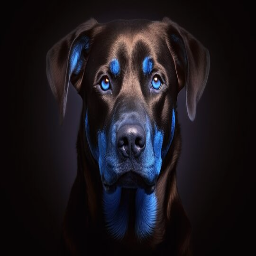

In [ ]:
test_img

In [ ]:
test_img.shape

(360, 540, 3)

In [ ]:
test_img = cv2.resize(test_img, (256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 409ms/step


array([[1.]], dtype=float32)

- Cat label is 0
- Dog label is 1